#  [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 
根據鐵達尼號乘客資料預測生還者。



In [2]:
import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() 

df = pd.read_csv('train.csv')      

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer       
from sklearn.preprocessing import LabelEncoder 

In [3]:
print(df.isnull().sum())
print(len(df))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
891


In [4]:
# df_test = pd.read_csv('/content/drive/MyDrive/data_analyze/test.csv')
df_test = pd.read_csv('test.csv')
print(df_test.isnull().sum())
print(len(df_test))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
418


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


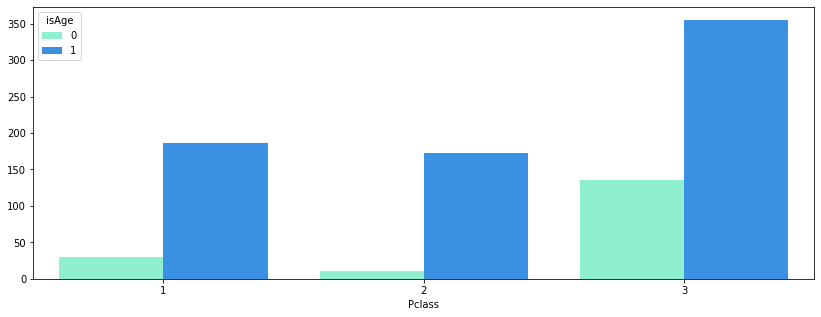

In [5]:
df['isAge'] =df['Age'].isnull().map( lambda x:0 if x==True else 1 )
fig, axs = plt.subplots(1,figsize=(14,5))
sns.countplot(df.Pclass, hue=df.isAge, palette=['aquamarine','dodgerblue'] )
plt.ylabel( '' ) 
plt.show()

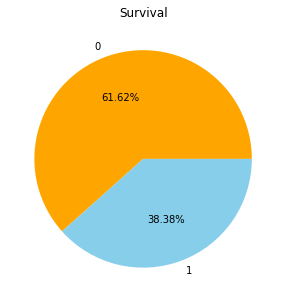

In [6]:
plt.figure( figsize=(8,5) )
df['Survived'].value_counts().plot( kind='pie', colors=['orange','skyblue'], autopct='%1.2f%%' )
plt.title( 'Survival' )  
plt.ylabel( '' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


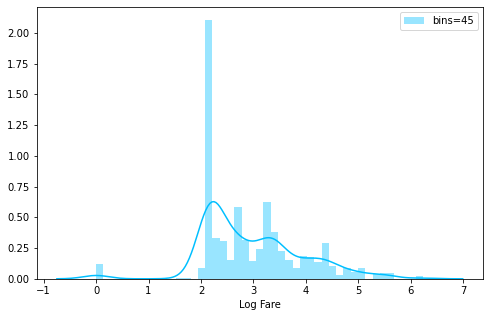

In [7]:
df['LogFare'] = np.log1p(df.Fare)

# print(df['LogFare'][:10])

fig, axs = plt.subplots( 1,1,figsize=(8,5) )
sns.distplot( df.LogFare, kde=True, bins=45, color='deepskyblue', label='bins=45' )
plt.xlabel( 'Log Fare' ) 
plt.ylabel( '' ) 
plt.legend( )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

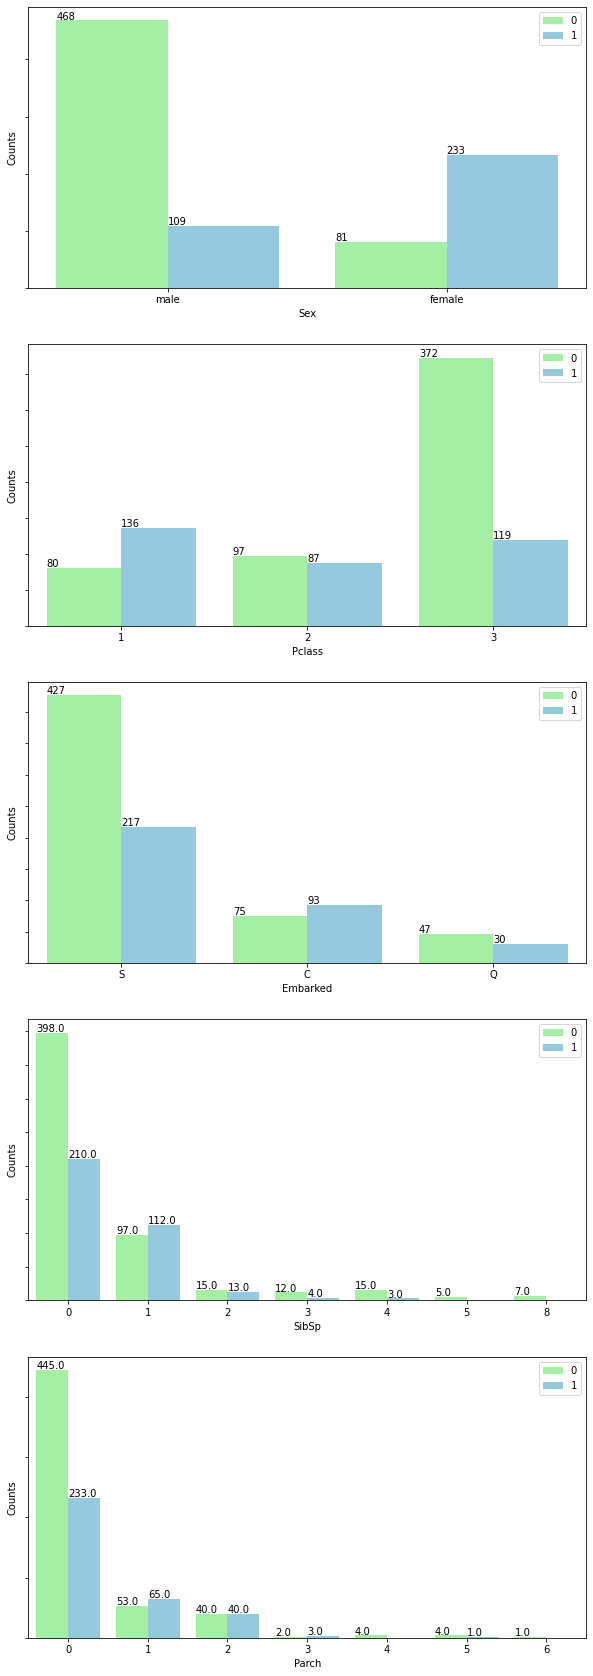

In [8]:
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']

plt.figure(figsize=(10,len(selected_cols)*6) )

gs = gridspec.GridSpec(len(selected_cols),1)  

for i, col in enumerate(df[selected_cols]):            
    plot=plt.subplot(gs[i])
    sns.countplot( df[col], hue=df.Survived, palette=['palegreen','skyblue'] )
    plot.set_yticklabels([])
    plot.set_ylabel('Counts')
    plot.legend( loc=1 )   
    for p in plot.patches:
        plot.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


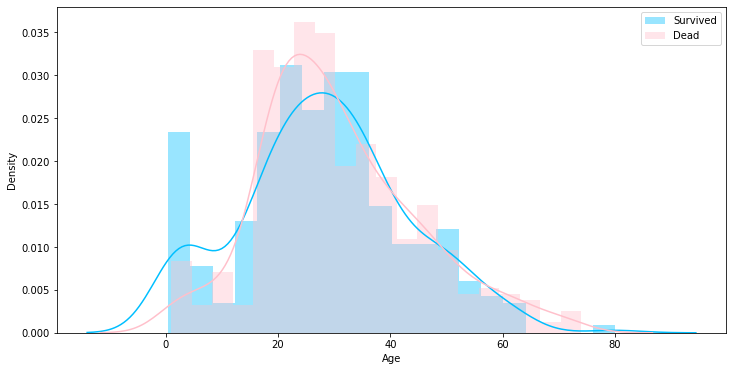

In [9]:
plt.figure( figsize=(12,6) )
sns.distplot( df.loc[df.Survived==1,'Age'], bins=20, color='deepskyblue', label='Survived' )
sns.distplot( df.loc[df.Survived==0,'Age'], bins=20, color='pink', label='Dead' )
plt.legend( )
plt.show( )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


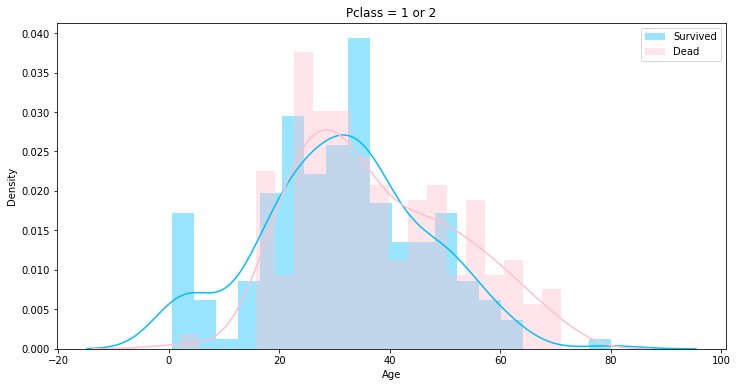

In [10]:
plt.figure( figsize=(12,6) )
sns.distplot( df.loc[(df.isAge==1)&(df.Pclass!=3)&(df.Survived==1),'Age'], bins=20, color='deepskyblue', label='Survived' )
sns.distplot( df.loc[(df.isAge==1)&(df.Pclass!=3)&(df.Survived==0),'Age'], bins=20, color='pink', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

In [11]:
df_data = df.append(df_test)
df_data['Name'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Name'] = df_data['Name'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Name'] = df_data['Name'].replace(['Lady'],'Mrs')
df_data['Name'] = df_data['Name'].replace(['Capt', 'Col', 'Countess', 'Don','Dr', 'Dona', 'Jonkheer', 'Major','Rev','Sir'],'Rare') 
df_data['Name'] = df_data['Name'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })

Ti_pred = df_data.groupby('Name')['Age'].mean().values

df_data['Age_fill'] = df_data['Age']

for i in range(0,5):
    df_data.loc[(df_data.Age.isnull()) & (df_data.Name == i),'Age_fill'] = Ti_pred[i]

df_data['Age_fill'] = df_data['Age_fill'].astype('int')
df_data['Age_fill'] = ((df_data['Age_fill']) < 16.0) * 1

df['Age_fill']=df_data['Age_fill'][:len(df)]
df_test['Age_fill']=df_data['Age_fill'][len(df):]

In [12]:
# df_data = df.append(df_test)
df_data['Connected_Survival'] = 0.5 
for _, df_grp in df_data.groupby('Ticket'):
    # print(df_grp)
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            # print(df_grp['Survived'])
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0

df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)

df['c']=np.nan
df['c']=df_data['Connected_Survival'][:len(df)]

df_test['c']=np.nan
df_test['c']=df_data['Connected_Survival'][len(df):]


In [13]:
le = LabelEncoder() 
df_data['cutfare']=pd.qcut(df_data['Fare'],5)
le.fit(df_data['cutfare'])
df_data['cutfare']=le.transform(df_data['cutfare'])

df['cutfare']=df_data['cutfare'][:len(df)]
df_test['cutfare']=df_data['cutfare'][len(df):]


In [14]:
df[ 'Sex_Pclass' ] = np.nan
df.loc[ (df.Sex=='female') & (df.Pclass==1), 'Sex_Pclass' ] = 3
df.loc[ (df.Sex=='female') & (df.Pclass==2), 'Sex_Pclass' ] = 3
df.loc[ (df.Sex=='female') & (df.Pclass==3), 'Sex_Pclass' ] = 2
df.loc[ (df.Sex=='male') & (df.Pclass==1), 'Sex_Pclass' ] = 2
df.loc[ (df.Sex=='male') & (df.Pclass==2), 'Sex_Pclass' ] = 2
df.loc[ (df.Sex=='male') & (df.Pclass==3), 'Sex_Pclass' ] = 1

df['parch_get'] = np.nan
df.loc[ df.Parch==0,'parch_get']=0
df.loc[ df.Parch!=0,'parch_get']=1
                           
le.fit(df['Sex'])                         
df['Sex'] = le.transform(df['Sex'])    

le.fit(df['Embarked'])                     
df['Embarked'] = le.transform(df['Embarked']) 
select=['Sex','Pclass','cutfare','Age_fill','c','Sex_Pclass']
# train_x = df[['Sex','Age','Pclass','LogFare','Embarked',,'parch_get']].copy()                   
train_x = df[select].copy()  
train_y = df['Survived'].copy() 


資料分析內容 : 鐵達尼號生存預測

對於生還者和罹難者的資料去進行分析，進而從那人的各種資料去預測那人是否為生還者



取出不同的特徵當作輸入:'Pclass','Embarked'還有一些自定義的特徵名稱(原特徵進行一些轉換):'cutfare','Sex_Pclass','parch_get','c'，方式就是把丟進模型的train_x加入要取的column

理由:分析後，了解其中有些參數對生存與否的影響和趨勢，像生存率Pclass 1 > Pclass 2 > Pclasss 3,或者是登船港口(Embarked)的生存率以 C 最高, 
S 最低

處理缺失值方式 : 

先用code抓出有缺失的column:有Age,Cabin.Embarked 

其中  Embarked 原本用填入眾數的方式

但後來跟Cabin一樣沒用到(加入的效果不好)就沒用他了

Age則是看他姓名中的稱謂分類後，找出他那類的中位數填入


轉換數值資料:

'LogFare':就是對'Fare'去取log

'cutfare':用=pd.qcut(df_data['Fare'],5)將fare的價格去分成五個等級，再用LabelEncoder() 把他轉成數字

轉換類別資料:'Sex'和'Embarked'都是用 LabelEncoder() 去轉換成數字 


使用其他方法進行資料前處理:

'Sex_Pclass':在 Pclass 1 與 Pclass 2 中，男女的生存率差異性更明顯，因此我跟據在不同艙等中的男女性生存率，給予不同的生存率級別(3最高、1最小)

'Age_fill':用名字當中的稱謂去對年齡缺失值做預測，除了常見的"Mr", "Master", "Miss", "Mrs", 剩下特殊的都歸類在 "Rare"，然後再看缺失值他的稱謂是屬於這五個其中哪一個，從那個類別當中的中位數取值填入

'Name':用名字當中的稱謂去對年齡缺失值做預測，除了常見的"Mr", "Master", "Miss", "Mrs", 剩下特殊的都歸類在 "Rare"，然後再把他的類別轉成數字

'c':用ticket去看有哪些人是一起的，分群之後，再看那群有無人生還，如果有其中一個生還，就給他們1的值，如果都沒生還，就給0，如果未知就給0.5

'parch_get':如果Parch=0就給他0，如果他不是等於0就賦予他1的值



資料視覺化:上圖中可以看出

1.女性的生存率明顯高於男性(女性人數只有男性人數的一半，生存人數卻是男性的兩倍)

2.票務艙(Pclass)的生存率大小: Pclass 1 > Pclass 2 > Pclasss 3

(尤其3跟1.2差很多,3的存活率只有25%)

3.登船港口(Embarked)的生存率以 C 最高，S最低

4.兄弟姐妹配偶人數(SibSp)有 1~3人同行時，則生存率較高，其他像4人以上樣本數太少就先不討論，0的樣本數很大，所以可以稍微比出0跟非0的差別，SibSp!=0的生存率較高

5.當船上的父母子女人數(Parch)為 1~3 人時，有較高的生存率,其他像4人以上樣本數太少就先不討論，0的樣本數很大，所以可以稍微比出0跟非0的差別，Parch!=0的生存率較高

6.假設在去除nan的Age後畫圖來看，年齡小於16歲的生存率明顯比較大，介於16~32的生存率比較低，大於40歲就比較沒有明顯差別，但如果還沒去除就去觀察他缺失值的分布，會發現很多缺失值都出現在pclass=3,會發現年齡對於生存率的明顯分界剩下age=16這條，小於16歲的生存率比較大



In [15]:
# 模型訓練

from sklearn.model_selection import KFold             
from sklearn.tree import DecisionTreeClassifier       
from sklearn.metrics import accuracy_score            
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

t=0
tt=0

clf=DecisionTreeClassifier()
bagging=BaggingClassifier(base_estimator=clf,n_estimators=100,bootstrap=True,bootstrap_features=True)

model_list=[DecisionTreeClassifier(), RandomForestClassifier(n_estimators=250,min_samples_split=20,random_state=2), svm.SVC(), GaussianNB(), LogisticRegression(), 
            GradientBoostingClassifier(n_estimators=25, max_depth=3) ,bagging, AdaBoostClassifier()]
vot_list=[]
for i in [0,1,5]:
  m=model_list[i]
  strr=str(i)
  vot_list.append((strr,m))

vot=VotingClassifier(vot_list)
model_list.append(vot)

model_acc=[]

# print(model_list)

max_acc=0

kf = KFold(n_splits=5, random_state=401*69,shuffle=True)

for w in range(0,9):
  train_acc_list = []                                   # 儲存每次訓練模型的準確度
  valid_acc_list = []                                   # 儲存每次驗證模型的準確度

  for train_index, valid_index in kf.split(train_x):      # 每個迴圈都會產生不同部份的資料
      train_x_split = train_x.iloc[train_index]         # 產生訓練資料
      train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
      valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
      valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

      model=model_list[w]                     #選擇使用哪個模型
      model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
      
      train_pred_y = model.predict(train_x_split)         # 確認模型是否訓練成功
      train_acc = accuracy_score(train_y_split, train_pred_y)    # 計算訓練資料準確度
                                
      valid_pred_y = model.predict(valid_x_split)           # 驗證模型是否訓練成功
      valid_acc = accuracy_score(valid_y_split, valid_pred_y)    # 計算驗證資料準確度
                                
      train_acc_list.append(train_acc)
      valid_acc_list.append(valid_acc)

  # print((
  #     'average train accuracy: {}\n' +
  #     '    min train accuracy: {}\n' +
  #     '    max train accuracy: {}\n' +
  #     'average valid accuracy: {}\n' +
  #     '    min valid accuracy: {}\n' +
  #     '    max valid accuracy: {}').format(
  #     np.mean(train_acc_list),                          # 輸出平均訓練準確度
  #     np.min(train_acc_list),                           # 輸出最低訓練準確度
  #     np.max(train_acc_list),                           # 輸出最高訓練準確度
  #     np.mean(valid_acc_list),                         # 輸出平均驗證準確度
  #     np.min(valid_acc_list),                           # 輸出最低驗證準確度
  #     np.max(valid_acc_list)                            # 輸出最高驗證準確度
  # ))
  model_acc.append(np.mean(valid_acc_list))
  if(np.mean(valid_acc_list)>max_acc):
    max_acc=np.mean(valid_acc_list)
  
print(model_acc)
print('max: ',max_acc)

[0.8429226037285794, 0.8406754127173436, 0.8417990082229615, 0.766580880045195, 0.8148578243675854, 0.8440461992341974, 0.8417990082229615, 0.8316929257422636, 0.8406754127173436]
max:  0.8440461992341974


以上為我的模型在valid中最高的準確率(84%)

使用決策樹以外的模型訓練: 隨機森林, SVM, 樸素貝葉斯, 邏輯迴歸, GBM

解釋模型演算法:

隨機森林 : 是決策樹集合，每個樹都給出分類，然後對這些樹的結果進行“投票”，最終選擇投票得數最多的哪一類別。

SVM : 在這個演算法中，我們將每個資料項繪製為 n 維空間中的一個點（其中 n 是特徵個數），每個特徵都對應特定的座標。

樸素貝葉斯 : 一種基於貝葉斯定理的分類演算法，具有預測因子之間相互獨立的假設。簡單來說，樸素貝葉斯分類器假定特徵之間是相互獨立的，特徵之間沒有相互影響。其可用來預測基於不同屬性的不同類別的概率，主要用於文字分類和多分類問題。

邏輯迴歸 : 一種分類演算法,它根據給定的一組自變數估計離散值,通過將資料擬合到 logit 函式來預測事件發生的概率。

GBM : 一種在處理大量資料以進行高預測的預測時使用的 Boosting 演算法。Boosting 實際上是一個學習演算法的集合，它結合了幾個基本估計量的預測，以便比單個估計量提高魯棒性。

模型超參數的選擇理由(隨機森林):

min_samples_split這個參數讓他比較不容易overfitting

n_estimators:是指樹的數量,代入讓結果比較好的值

random_state:把隨機因子拿掉，比較好進行比較

使用 5-fold cross validation 輸出平均準確度:

程式碼當中的:kf = KFold(n_splits=5, random_state=401*69,shuffle=True)



使用多個模型進行實驗:

1.RandomForestClassifier() 2. svm.SVC() 3. GaussianNB()
4.LogisticRegression() 5. GradientBoostingClassifier()



使用ensemble進行實驗: 1. GradientBoostingClassifier 2. BaggingClassifier() 3. AdaBoostClassifier() 4. VotingClassifier()



In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=250,min_samples_split=20,random_state=2,oob_score=True)
train_x = df[select].copy()  
train_y = df['Survived'].copy() 
model.fit(train_x,train_y)
print(model.oob_score_)

0.8406285072951739


In [17]:
df_test['Fare'].fillna( df_test.Fare.median(), inplace=True)

df_test['LogFare'] = np.log1p( df_test.Fare )

df_test[ 'Sex_Pclass' ] = np.nan
df_test.loc[ (df_test.Sex=='female') & (df_test.Pclass==1), 'Sex_Pclass' ] = 3
df_test.loc[ (df_test.Sex=='female') & (df_test.Pclass==2), 'Sex_Pclass' ] = 3
df_test.loc[ (df_test.Sex=='female') & (df_test.Pclass==3), 'Sex_Pclass' ] = 2
df_test.loc[ (df_test.Sex=='male') & (df_test.Pclass==1), 'Sex_Pclass' ] = 2
df_test.loc[ (df_test.Sex=='male') & (df_test.Pclass==2), 'Sex_Pclass' ] = 2
df_test.loc[ (df_test.Sex=='male') & (df_test.Pclass==3), 'Sex_Pclass' ] = 1

df_test['parch_get'] = np.nan
df_test.loc[ df_test.Parch==0,'parch_get']=0
df_test.loc[ df_test.Parch!=0,'parch_get']=1

le.fit(df_test['Sex'])                         
df_test['Sex'] = le.transform(df_test['Sex'])    

le.fit(df_test['Embarked'])                     
df_test['Embarked'] = le.transform(df_test['Embarked']) 

# train_x = df_test[['Sex','Age','Pclass','LogFare','Embarked','Sex_Pclass','parch_get']].copy()                   
train_x = df_test[select].copy()      

submit = pd.read_csv('gender_submission.csv')
test_pred = model.predict(train_x)
submit['Survived'] = test_pred.astype(int)
submit.to_csv( 'output.csv', index=False )


以上為將模型(隨機森林)套用在test.csv上，並且產生輸出output.csv檔，再拿去上傳kaggle(kaggle分數截圖放在後面)

In [18]:
train_x = df[['Sex','Pclass','Embarked','Parch','Age','Fare']].copy()                   # 取出訓練資料需要分析的資料欄位
train_y = df['Survived'].copy() 

imputer = SimpleImputer(strategy='median')     # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                               # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)        # 填補缺失值

train_acc_list = []                                   
valid_acc_list = []                                   

for train_index, valid_index in kf.split(train_x):      # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model= RandomForestClassifier()               #選擇使用哪個模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split, train_pred_y)    # 計算訓練資料準確度
                              
    valid_pred_y = model.predict(valid_x_split)           # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split, valid_pred_y)    # 計算驗證資料準確度
                              
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
print((
      'average train accuracy: {}\n' +
      '    min train accuracy: {}\n' +
      '    max train accuracy: {}\n' +
      'average valid accuracy: {}\n' +
      '    min valid accuracy: {}\n' +
      '    max valid accuracy: {}').format(
      np.mean(train_acc_list),                          # 輸出平均訓練準確度
      np.min(train_acc_list),                           # 輸出最低訓練準確度
      np.max(train_acc_list),                           # 輸出最高訓練準確度
      np.mean(valid_acc_list),                         # 輸出平均驗證準確度
      np.min(valid_acc_list),                           # 輸出最低驗證準確度
      np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

average train accuracy: 0.981480372535733
    min train accuracy: 0.9775280898876404
    max train accuracy: 0.9845722300140253
average valid accuracy: 0.807005209967987
    min valid accuracy: 0.7653631284916201
    max valid accuracy: 0.8426966292134831


上面這個為overfitting的例子(train 和 test 準確度差10%以上)

In [19]:
train_x = df[['SibSp']][:70].copy()                   
train_y = df['Survived'][:70].copy()  

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):      # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model=    RandomForestClassifier(n_estimators=250,min_samples_split=20,oob_score=True,random_state=2)     #選擇使用哪個模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split, train_pred_y)    # 計算訓練資料準確度
                              
    valid_pred_y = model.predict(valid_x_split)           # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split, valid_pred_y)    # 計算驗證資料準確度
                              
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
print((
      'average train accuracy: {}\n' +
      '    min train accuracy: {}\n' +
      '    max train accuracy: {}\n' +
      'average valid accuracy: {}\n' +
      '    min valid accuracy: {}\n' +
      '    max valid accuracy: {}').format(
      np.mean(train_acc_list),                          # 輸出平均訓練準確度
      np.min(train_acc_list),                           # 輸出最低訓練準確度
      np.max(train_acc_list),                           # 輸出最高訓練準確度
      np.mean(valid_acc_list),                         # 輸出平均驗證準確度
      np.min(valid_acc_list),                           # 輸出最低驗證準確度
      np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

average train accuracy: 0.5964285714285714
    min train accuracy: 0.5892857142857143
    max train accuracy: 0.625
average valid accuracy: 0.48571428571428565
    min valid accuracy: 0.42857142857142855
    max valid accuracy: 0.5714285714285714


上面這個為underfitting的狀況(train的準確度=59%)

## 加分題

請將訓練後的模型套用至 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) `test.csv` 上，並上傳至 Kaggle 進行評分，**截圖**後**嵌入**至 `markdown` 區塊中。

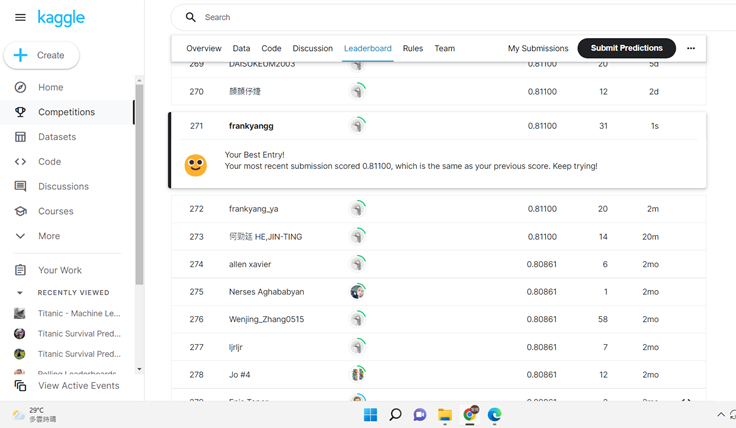)

In [20]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 31.447645902633667
